In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.keras.models
tf.keras.layers
tf.keras.optimizers

<module 'keras.models' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\models\\__init__.py'>

<module 'keras._tf_keras.keras.layers' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\_tf_keras\\keras\\layers\\__init__.py'>

<module 'keras.optimizers' from 'c:\\Users\\k26ra\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\optimizers\\__init__.py'>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import RootMeanSquaredError

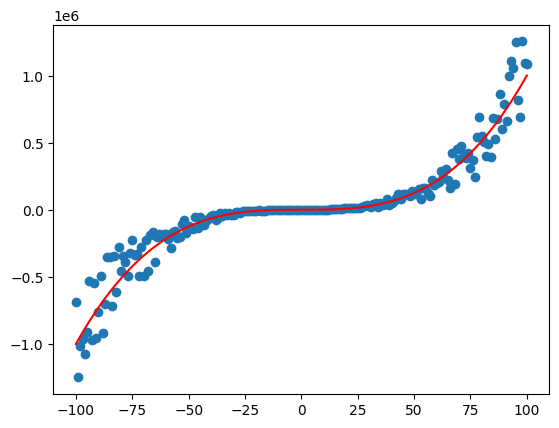

In [136]:
X = np.arange(-100, 101).astype(float)
offset = 0.5
y_original = X ** 3
y_noised = np.array([x - x * np.random.choice([np.random.uniform(-offset, 0), np.random.uniform(0, offset)])
                    for x in y_original])
plt.scatter(X, y_noised)
plt.plot(X, y_original, 'r')

y = y_noised

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 479061278720.0000 - root_mean_squared_error: 695350.4375  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 443268202496.0000 - root_mean_squared_error: 664450.9375
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 369436819456.0000 - root_mean_squared_error: 601819.1875 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 380993339392.0000 - root_mean_squared_error: 621768.1875
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316069642240.0000 - root_mean_squared_error: 561518.0000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 280068030464.0000 - root_mean_squared_error: 530337.5000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 276328349696.0000 - root_mean_squared_error: 528595.2500
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 255186157568.0000 - root_mean_squared_error: 508545.9375
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 216608849920.0000 - root_me

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training Loss Curve')

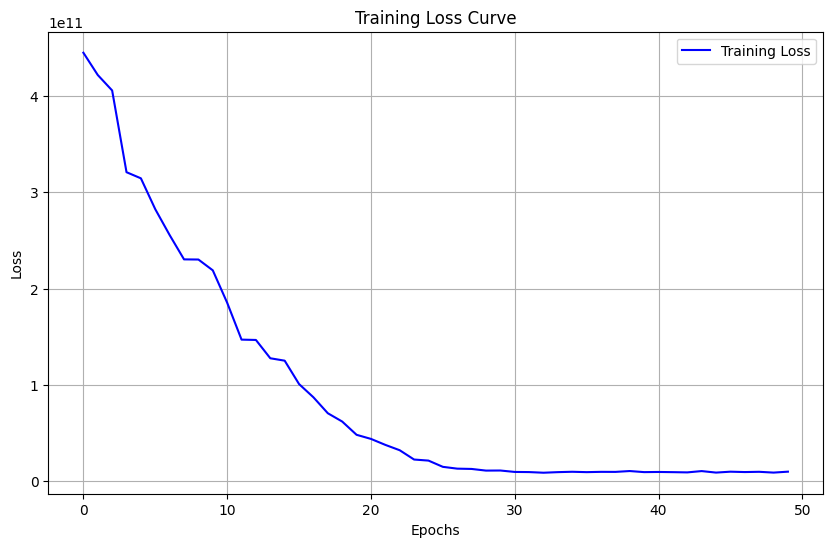

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Original Data and Predicted Curve')

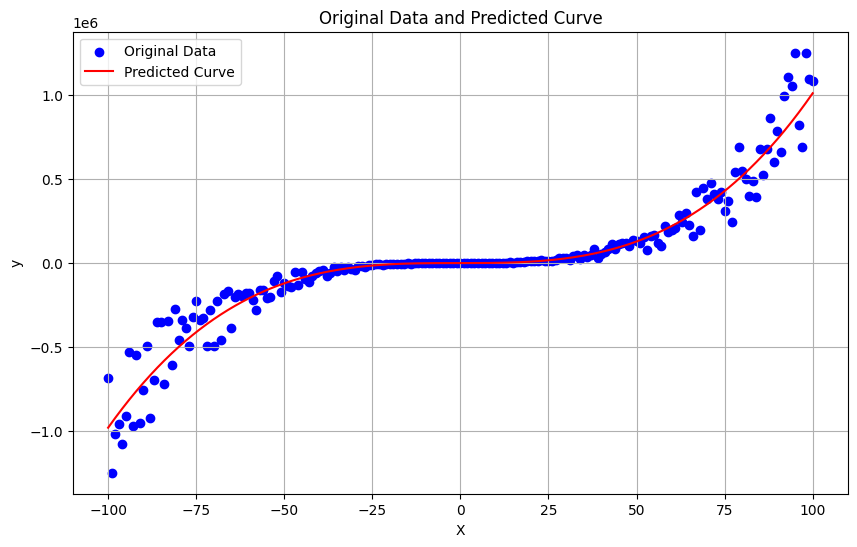

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


def build_polynomial_model(lr, degree):
  model = Sequential([
      Input(shape=(degree + 1,)),  # Include bias term
      Dense(units=1)
  ])
  model.compile(optimizer=RMSprop(learning_rate=lr),
                loss=MeanSquaredError(),
                metrics=[RootMeanSquaredError()])
  return model


# Example usage
# Generate sample data
# X = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 3.5, 6, 8, 9])

# Transform input features to include polynomial terms
degree = 3  # Example degree for polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Build and train the polynomial regression model
model = build_polynomial_model(lr=0.01, degree=degree)
history = model.fit(X_poly, y, epochs=50, verbose=1)

# Predictions
y_pred = model.predict(X_poly)
print("Predictions:", y_pred.flatten())

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Predicted Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data and Predicted Curve')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
def build_model(lr):
  model = Sequential([
      Input(shape=(1,)),
      Dense(units=1)
  ])
  model.compile(optimizer=RMSprop(learning_rate=lr),
                loss="mean_squared_error", metrics=[RootMeanSquaredError()])
  return model

In [120]:
def train_model(model, X, y, epochs, batch_size):
  history = model.fit(x=X, y=y, epochs=epochs,
                      batch_size=batch_size)

  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  rmse = pd.DataFrame(history.history)['root_mean_squared_error']

  return trained_weight, trained_bias, epochs, rmse

In [154]:
def plot_the_model(trained_weight, trained_bias, X, y_noised):
  plt.scatter(X, y_noised)

  # x0 = 0
  # y0 = trained_bias
  # x1 = X[-1]
  # y1 = trained_bias + (trained_weight * x1)

  # plt.plot([x0, x1], [y0, y1], 'g')
  plt.plot(X, trained_bias + (trained_weight * X), 'g')
  # plt.plot(X, y_original, 'r')
  plt.show()

In [122]:
def plot_the_loss_curve(epochs, rmse):
  plt.plot(epochs, rmse, label="Loss")

  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.legend()
  plt.show()

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 160351322112.0000 - root_mean_squared_error: 400438.9062
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 147796017152.0000 - root_mean_squared_error: 384442.4688
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 139328667648.0000 - root_mean_squared_error: 373267.5625
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 132606984192.0000 - root_mean_squared_error: 364152.4375
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 126904205312.0000 - root_mean_squared_error: 356236.1562
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 121886908416.0000 - root_mean_squared_error: 349123.0625
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 117370732544.0000 - root_mean_squared_error: 342594.1250
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 113241653248.0000 - root_mean_squared_error: 336513.9688
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 109423747072.0000 - root_mean_

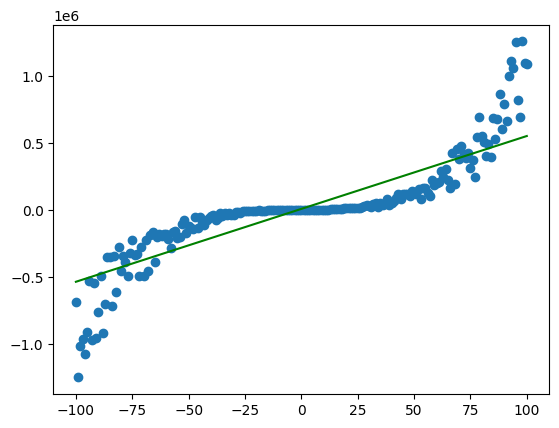

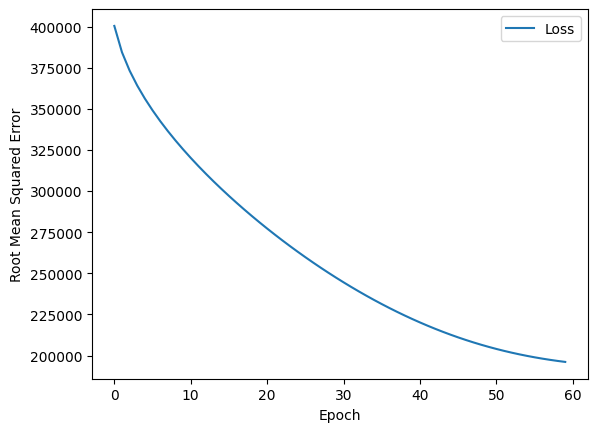

57896.9236420557

1377665227.7703328

In [161]:
from sklearn.metrics import mean_absolute_error

lr = 100.
epochs = 60
batch_size = len(y_noised)

model = build_model(lr)
trained_weight, trained_bias, epochs, rmse = train_model(
    model, X, y_noised, epochs, batch_size)
plot_the_model(trained_weight, trained_bias, X, y_noised)
plot_the_loss_curve(epochs, rmse)

mean_absolute_error(y_original, y_noised)
mean_absolute_error(y_original, (y_original * trained_weight) + trained_bias)